# Basic Statistics in Python

Dataset from Kaggle : **"Pokemon with stats"** by *Alberto Barradas*  
Source: https://www.kaggle.com/abcsds/pokemon (requires login)

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

### Import the Dataset

The dataset is in CSV format; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [2]:
pkmndata = pd.read_csv('pokemonData.csv')
pkmndata.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Description of the dataset, as available on Kaggle, is as follows.
Learn more : https://en.wikipedia.org/wiki/List_of_Pok%C3%A9mon

> **\#** : ID for each Pokemon (runs from 1 to 721)  
> **Name** : Name of each Pokemon  
> **Type 1** : Each Pokemon has a basic Type, this determines weakness/resistance to attacks  
> **Type 2** : Some Pokemons are dual type and have a Type 2 value (set to nan otherwise)  
> **Total** : Sum of all stats of a Pokemon, a general guide to how strong a Pokemon is  
> **HP** : Hit Points, defines how much damage a Pokemon can withstand before fainting  
> **Attack** : The base modifier for normal attacks by the Pokemon (e.g., scratch, punch etc.)  
> **Defense** : The base damage resistance of the Pokemon against normal attacks  
> **SP Atk** : Special Attack, the base modifier for special attacks (e.g. fire blast, bubble beam)  
> **SP Def** : Special Defense, the base damage resistance against special attacks  
> **Speed** : Determines which Pokemon attacks first each round  
> **Generation** : Each Pokemon belongs to a certain Generation  
> **Legendary** : Legendary Pokemons are powerful, rare, and hard to catch

---

Check the vital statistics of the dataset using the `type` and `shape` attributes.

In [3]:
print("Data type : ", type(pkmndata))
print("Data dims : ", pkmndata.size) #dataframe.size returns a single number, rowsXCol
print("Data dims : ", pkmndata.shape) #dataframe.size returns a tuple

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  10400
Data dims :  (800, 13)


# Check the variables (and their types) in the dataset using the `dtypes` attribute.

In [4]:
print(pkmndata.dtypes)

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


In [5]:
pd.read_csv("train.csv",header=None)

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1456,60,RL,62,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,1457,20,RL,85,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,1458,70,RL,66,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1459,1459,20,RL,68,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


---

### Extract a Single Variable

We will start by analyzing a single variable from the dataset, **HP**.  
This variable tells us defines how much damage a Pokemon can withstand.  
Extract the variable and its associated data as a Pandas `DataFrame`.

In [6]:
print(type(pkmndata['HP']))
hp = pd.DataFrame(pkmndata['HP'])# DataFrame not only takes in a python dict, but also a series and converts it back to a dataframes
print("Data type : ", type(hp))
print("Data dims : ", hp.size)
hp.head(10)

<class 'pandas.core.series.Series'>
Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  800


,HP
0,45
1,60
2,80
3,80
4,39
5,58
6,78
7,78
8,78
9,44


---

### Uni-Variate Statistics

Check the Summary Statistics of Uni-Variate Series using `describe`.

In [7]:
hp.describe()

,HP
count,800.000000
mean,69.258750
std,25.534669
min,1.000000
25%,50.000000
50%,65.000000
75%,80.000000
max,255.000000


Check the Summary Statistics visually using a standard `boxplot`.

<AxesSubplot:>

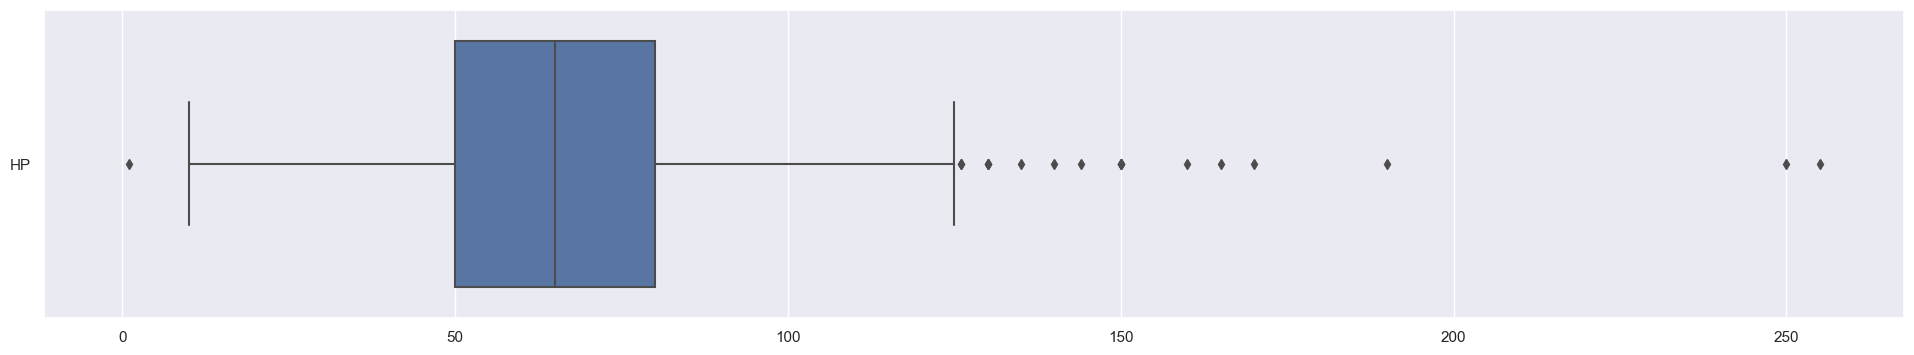

In [8]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = hp, orient = "h")

Extend the summary to visualize the complete distribution of the Series.  
The first visualization is a simple Histogram with automatic bin sizes.

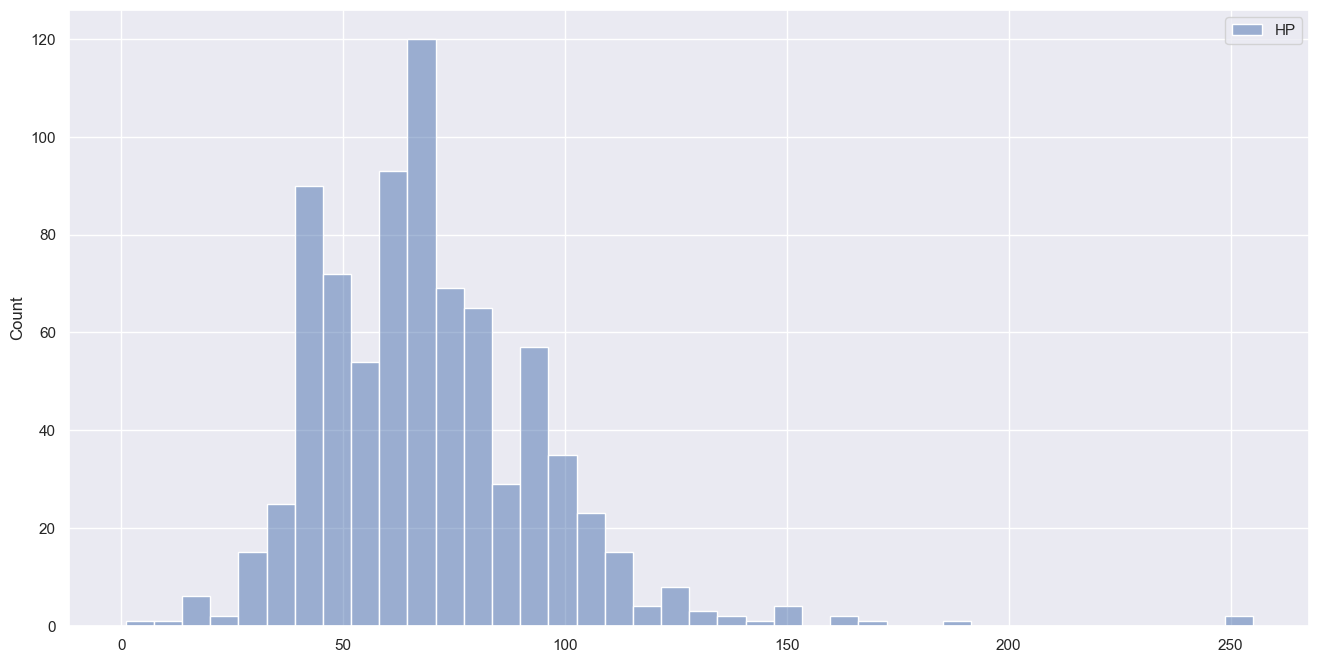

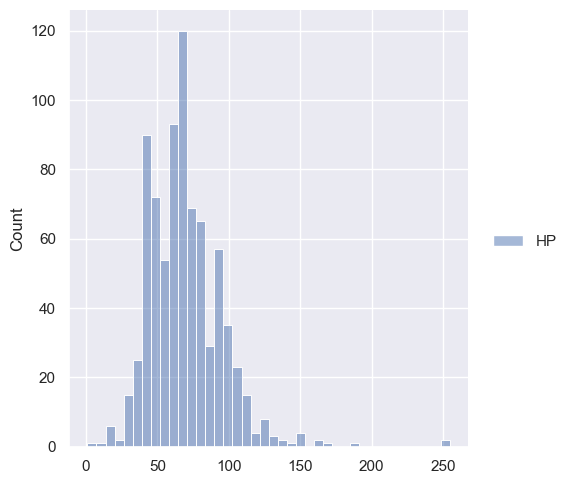

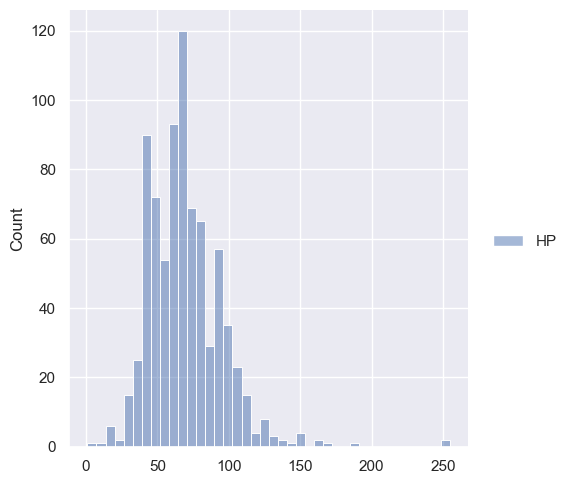

In [9]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = hp)
sb.displot(data=hp,kind="hist")
sb.displot(data=hp,kind="hist")

The second visualization is a simple Kernel Density Estimate (KDE).

<AxesSubplot:ylabel='Density'>

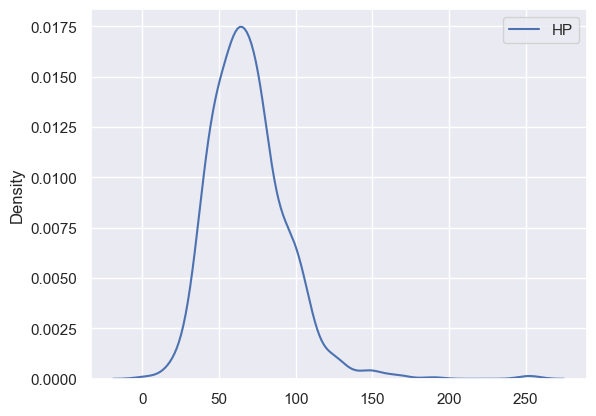

In [10]:
#f = plt.figure(figsize=(16, 8))
sb.kdeplot(data = hp)

You may also want a combination of the two, `hist` and `kde`, as follows.

[1] hi


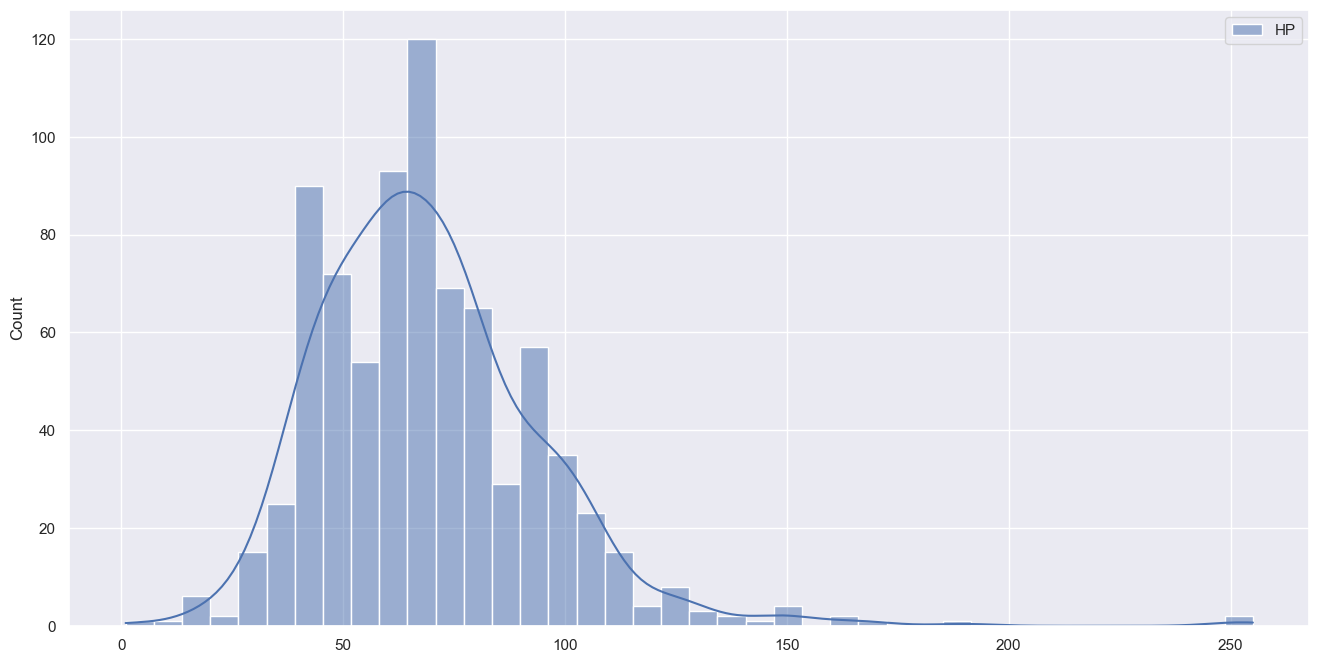

In [11]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = hp, kde = True)
print(plt.get_fignums(),"hi")

Finally, the **Violin Plot** combines boxplot with kernel density estimate.

[1, 2] hi
[1, 2] last


<Figure size 1600x900 with 0 Axes>

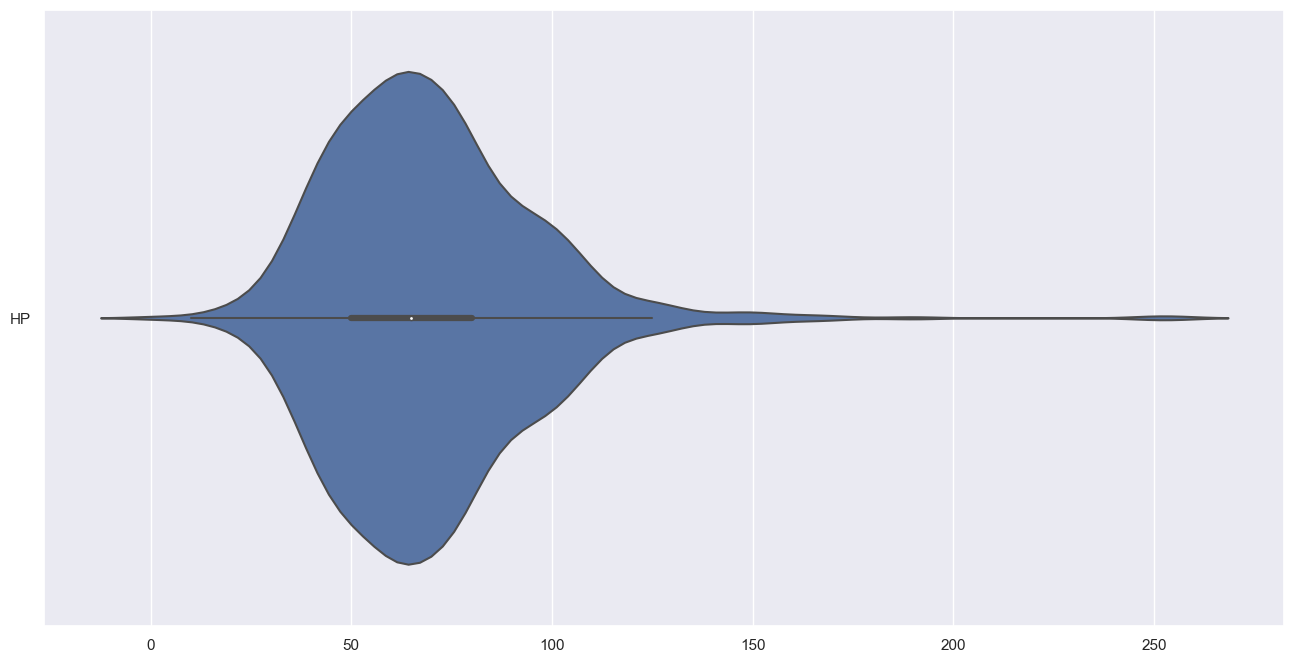

[] final


In [12]:
plt.figure(figsize=(16, 9))
plt.figure(figsize=(16, 8))
sb.violinplot(data = hp, orient = "h")
print(plt.get_fignums(),"hi")
#plt.close()
#sb.violinplot(data = hp, orient = "v")
#plt.show()
print(plt.get_fignums(),"last")
plt.show()
print(plt.get_fignums(),"final")

In [13]:
print(plt.get_fignums(),"hi")

[] hi


---

### Extract Two Variables

Next, we will analyze two variables from the dataset, **HP** vs **Attack**.  
Extract the two variables and their associated data as a Pandas `DataFrame`.

In [14]:
hp = pd.DataFrame(pkmndata['HP'])
attack = pd.DataFrame(pkmndata['Attack'])

---

### Bi-Variate Statistics

We can of course check the uni-variate Summary Statistics for each variable.

In [15]:
# Summary Statistics for HP
hp.describe()

,HP
count,800.000000
mean,69.258750
std,25.534669
min,1.000000
25%,50.000000
50%,65.000000
75%,80.000000
max,255.000000


In [16]:
# Summary Statistics for Attack
attack.describe()

,Attack
count,800.000000
mean,79.001250
std,32.457366
min,5.000000
25%,55.000000
50%,75.000000
75%,100.000000
max,190.000000


And visualize the uni-variate Distributions of each variable independently.

<AxesSubplot:>

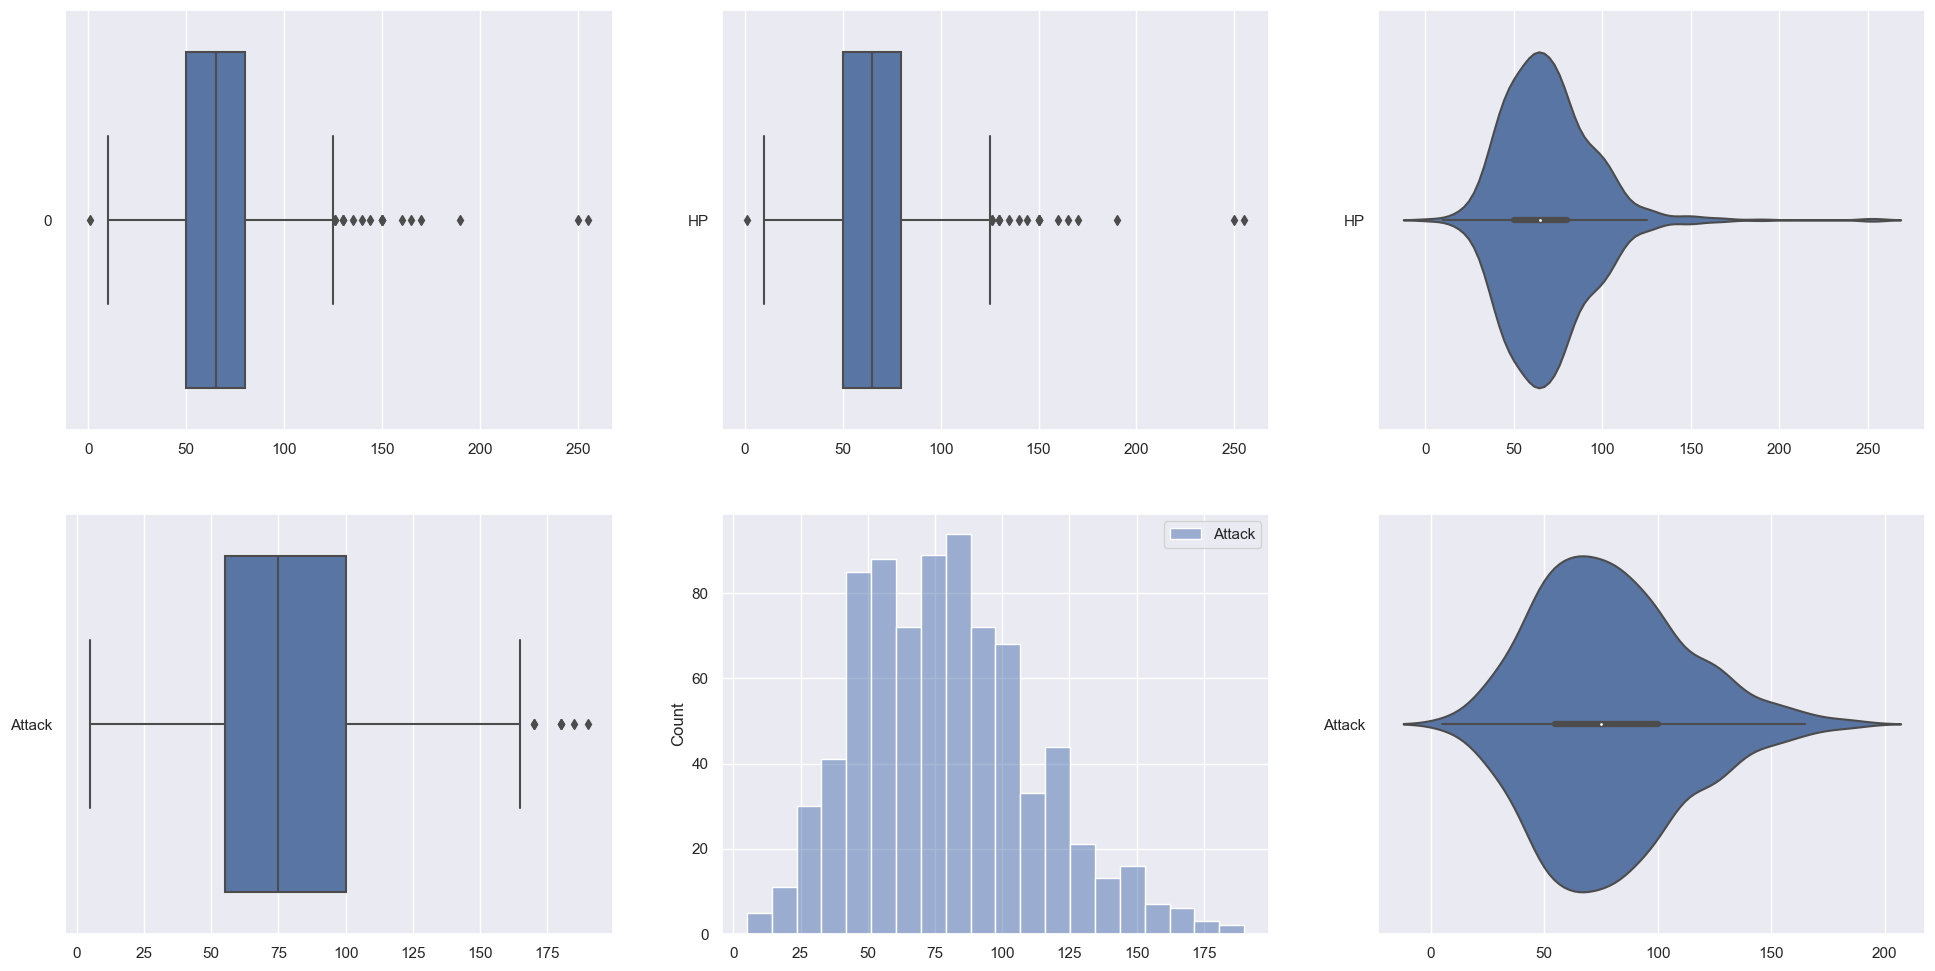

In [20]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP
#indexing into nested lists can be done by either list[a][b] or list[a,b]
sb.boxplot(data = pkmndata["HP"], orient = "h", ax = axes[0,0])
sb.boxplot(data = hp, orient = "h", ax = axes[0,1])
#sb.histplot(data = hp, ax = axes[0,1])
sb.violinplot(data = hp, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for Attack
sb.boxplot(data = attack, orient = "h", ax = axes[1,0])
sb.histplot(data = attack, ax = axes[1,1])
sb.violinplot(data = attack, orient = "h", ax = axes[1,2])

However, it will be more interesting to visualize them together in a `jointplot`.

In [ ]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([attack, hp], axis = 1).reindex(attack.index)
jointDF

In [ ]:
# Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data = jointDF, x = "Attack", y = "HP", height = 12)

As it tells us something about the **Correlation** between the two variables.

In [ ]:
# Calculate the correlation between the two columns/variables
jointDF.corr()

barely any correlation tho, right??

One may visualize the correlation matrix as a `heatmap` to gain a better insight.

In [ ]:
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

---

### Multi-Variate Statistics

Similarly, we may analyze all numeric values in the original dataset.

In [ ]:
# Extract only the numeric data variables
print(type(pkmndata[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]]))


numDF = pd.DataFrame(pkmndata[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]])

# Summary Statistics for all Variables
numDF.describe()

In [ ]:
# Draw the Boxplots of all variables
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = numDF, orient = "h")

In [ ]:
# Draw the distributions of all variables
f, axes = plt.subplots(6, 3, figsize=(18, 24))

count = 0
for var in numDF:
    print(var)
    sb.boxplot(data = numDF[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numDF[var], ax = axes[count,1])
    sb.violinplot(data = numDF[var], orient = "h", ax = axes[count,2])
    count += 1

In [ ]:
# Calculate the complete  correlation matrix
numDF.corr()

In [ ]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(numDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [ ]:
# Draw pairs of variables against one another
sb.pairplot(data = numDF)